# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [121]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [122]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


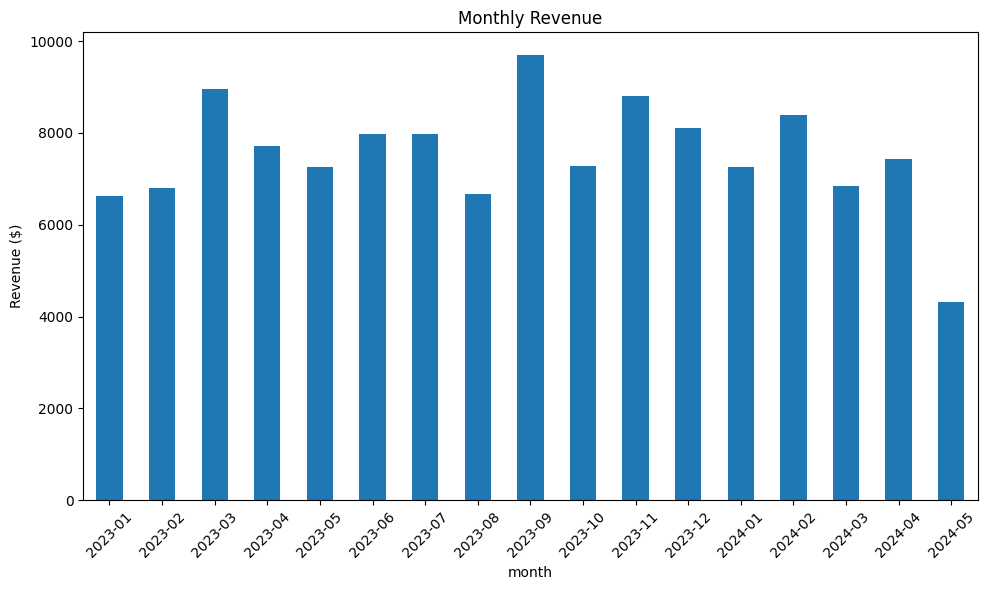

In [123]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Q2 Revenue:
month
2024-01    7268.59
2024-02    8388.91
2024-03    6637.30
Freq: M, Name: revenue, dtype: float64


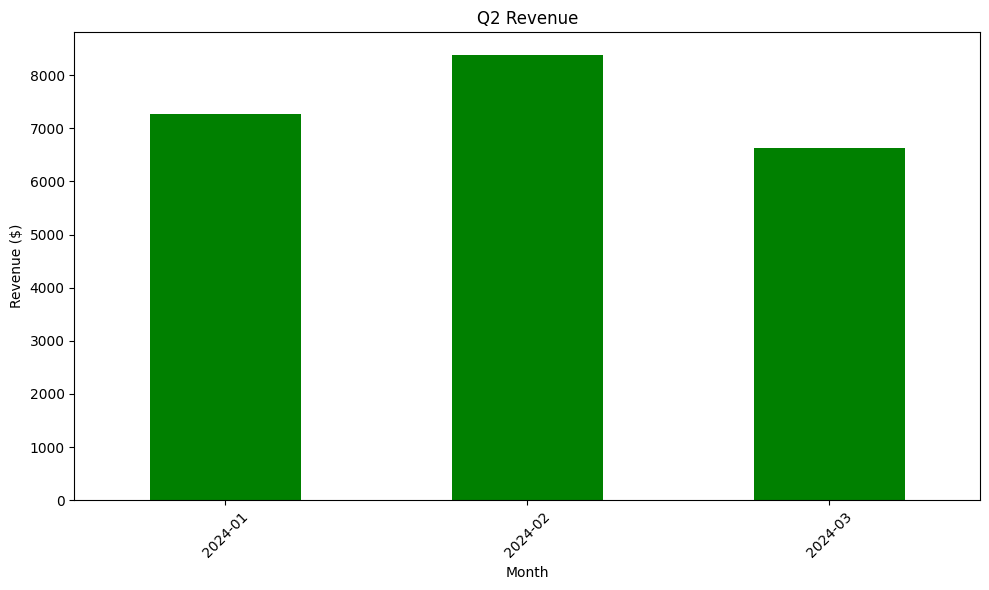

In [124]:
# Most recent data is from 2024-05 (May 2024), so it is currently Q3. Thus we are looking at Q2 (Jan 2024 - Mar 2024) revenue. 
filtered_data = data.copy()
filtered_data = filtered_data.loc[(data['order_date'] >= '2024-01-01') & (data['order_date'] < '2024-03-31')]

filtered_data['month'] = filtered_data['order_date'].dt.to_period("M")
q2_revenue = filtered_data.groupby('month')['revenue'].sum()
print('Q2 Revenue:')
print(q2_revenue)

q2_revenue.plot(kind='bar',figsize=(10,6), title="Q2 Revenue", color='green')
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


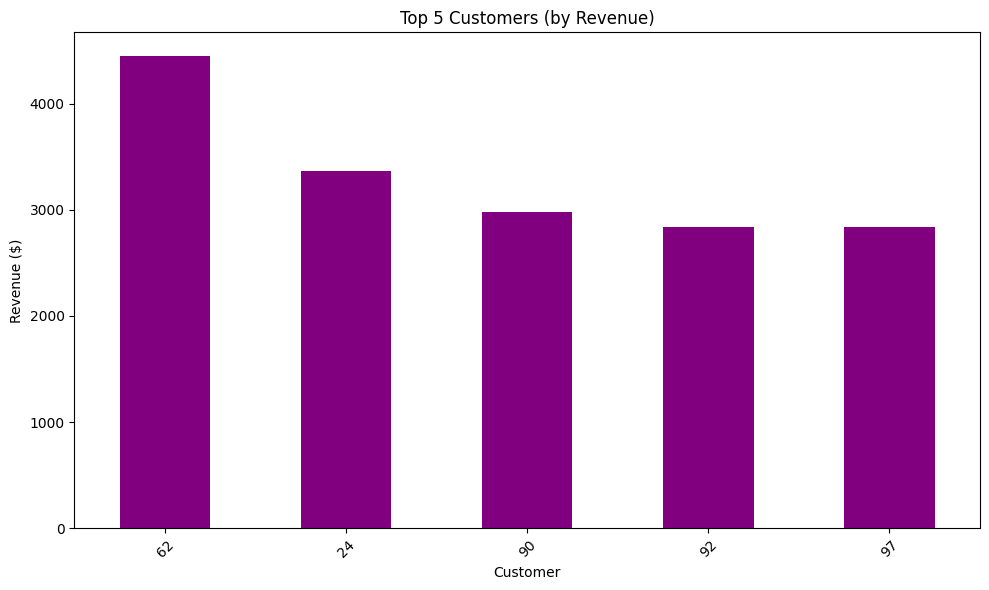

In [125]:
# Your code here
data.head()
top_customers = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)
top_5 = top_customers.head(5)

print(top_5)

top_5.plot(kind='bar',figsize=(10,6), title="Top 5 Customers (by Revenue)", color='purple')
plt.ylabel("Revenue ($)")
plt.xlabel("Customer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [126]:
# Your code here
top_segments = data.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
print("Customer segment that spends the most on average per order:")
print(top_segments.head(1))


Customer segment that spends the most on average per order:
customer_segment
Senior    262.133925
Name: revenue, dtype: float64


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [127]:
# Your code here
region_profit = data.groupby('region')['revenue'].mean().sort_values(ascending=False)
region_quantity = data.groupby('region')['quantity'].mean().sort_values(ascending=False)
print("Region that generated the most revenue:")
print(region_profit.head(1),'\n')
print("Region with the highest average order size:")
print(region_quantity.head(1))

Region that generated the most revenue:
region
South    274.326378
Name: revenue, dtype: float64 

Region with the highest average order size:
region
West    2.627273
Name: quantity, dtype: float64


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [128]:
# Your code here
prod_cat_quantity = data.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
prod_cat_rev = data.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

print("Product most popular by quantity:")
print(prod_cat_quantity.head(1),'\n')
print("Product most popular by revenue:")
print(prod_cat_rev.head(1))


Product most popular by quantity:
product_category
Home    269
Name: quantity, dtype: int64 

Product most popular by revenue:
product_category
Home    29871.47
Name: revenue, dtype: float64


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [129]:
# Your code here
data['is_discounted'] = df['discount_applied'] != 0
discount_effective = data.groupby('is_discounted')['revenue'].mean().sort_values(ascending=False)
print(discount_effective)

is_discounted
True     263.831362
False    248.296337
Name: revenue, dtype: float64


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [130]:
# Your code here
data.head()
print(data['payment_method'].value_counts(normalize=True) * 100)
print()

pay_mthd_rev = data.groupby('payment_method')['revenue'].describe()
print(pay_mthd_rev)

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

                count        mean         std    min       25%      50%  \
payment_method                                                            
Credit Card     137.0  257.444234  182.633796  15.91  111.5600  186.630   
Debit Card      123.0  275.980650  197.235218  15.52  113.4900  234.160   
Gift Card       124.0  254.362500  190.409361  11.34  107.3300  215.750   
PayPal          116.0  236.071034  198.872660  20.88   84.1325  164.945   

                     75%     max  
payment_method                    
Credit Card     388.1100  791.20  
Debit Card      399.6150  793.60  
Gift Card       350.3250  784.52  
PayPal          374.9325  791.08  


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

day_of_week
Sunday       17530.24
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Name: revenue, dtype: float64


/tmp/ipykernel_26598/1116233908.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonality = data.groupby('day_of_week')['revenue'].sum()


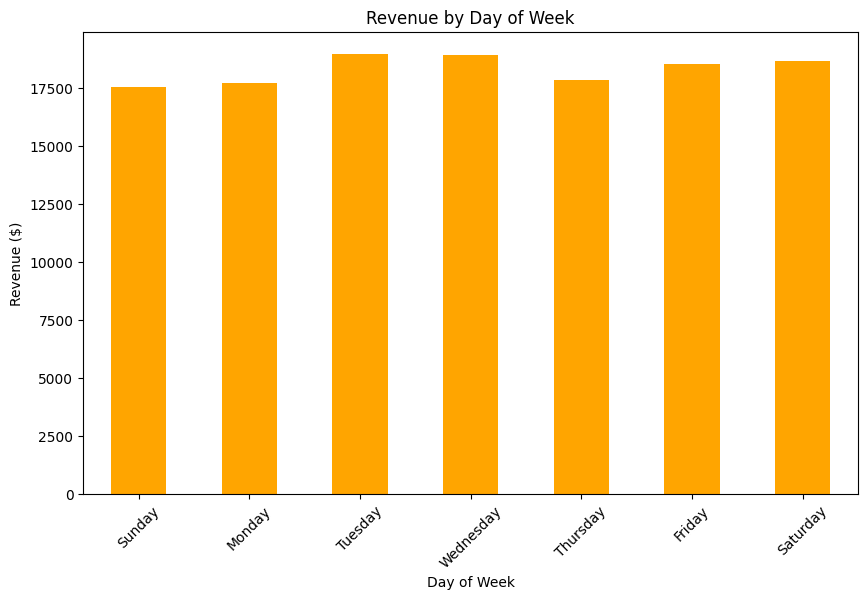

In [131]:
# Your code here
custom_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
data['day_of_week'] = pd.Categorical(data['day_of_week'] , categories=custom_order, ordered=True)

seasonality = data.groupby('day_of_week')['revenue'].sum()
print(seasonality.head(7))

seasonality.plot(kind='bar',figsize=(10,6), title="Revenue by Day of Week", color='orange')
plt.ylabel("Revenue ($)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [132]:
# Your code here
profit_margin = data['revenue'].sum() * 0.20
print(f"Estimated profit: ${profit_margin: .2f}")

region_profit.head(1)


Estimated profit: $ 25628.13


region
South    274.326378
Name: revenue, dtype: float64

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

- Sales went down towards the end of the last quarter
- "Home" is the most popular category both by revenue and quantity -> should create and advertise more products in this category
- Revenue doesn't vary **too** much depending on day of the week
- Focus on areas that are already driving most of the profit (the South is the most profitable region)

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.